<a href="https://colab.research.google.com/github/tomo0608/GP_and_ML/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from pylab import *
np.set_printoptions(precision=4, suppress=True)

In [3]:
! wget http://chasen.org/~daiti-m/gpbook/data/gpr-data.zip
! unzip -j -o gpr-data.zip

--2021-12-10 12:22:59--  http://chasen.org/~daiti-m/gpbook/data/gpr-data.zip
Resolving chasen.org (chasen.org)... 160.16.121.64
Connecting to chasen.org (chasen.org)|160.16.121.64|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 304811 (298K) [application/zip]
Saving to: ‘gpr-data.zip’

gpr-data.zip        100%[===================>] 297.67K   484KB/s    in 0.6s    

2021-12-10 12:23:00 (484 KB/s) - ‘gpr-data.zip’ saved [304811/304811]

Archive:  gpr-data.zip
  inflating: crimes.data.txt         
  inflating: crimes.names.txt        
  inflating: forest-fires.csv        
  inflating: forest-fires.names      
  inflating: forest.dat              
  inflating: gpr.dat                 
  inflating: mauna-loa.dat           
 extracting: simple1.dat             
  inflating: simple2.dat             


In [4]:
def linear_model(X):
  N = len(X)
  y = X[:, 0]
  X = np.vstack([np.ones(N), X[:,1]]).T
  w = inv(X.T.dot(X)).dot(X.T).dot(y)
  return w

In [5]:
def simple_plot (X):
  xmin,xmax = -5,5
  ymin,ymax = -5,5
  plt.scatter(X[:,1],X[:,0],marker='x',s=80)
  plt.plot([xmin,xmax],[0,0],'k',linewidth=1)
  plt.plot([0,0],[ymin,ymax],'k',linewidth=1)
  plt.axis([xmin,xmax,ymin,ymax])

In [9]:
def lm_plot(X):
  xmin,xmax = -5,5
  ymin,ymax = -5,5
  simple_plot(X)
  w = linear_model(X)
  M = 20
  xx = linspace(xmin,xmax,M)
  yy =[w[0]+w[1]*x for x in xx]
  plt.plot (xx,yy)
  gca().set_aspect(1)
  print(w)

In [7]:
X = np.loadtxt('simple1.dat')
print(X)

[[ 2.  3.]
 [ 4.  2.]
 [ 1. -1.]]


[1.7692 0.4231]


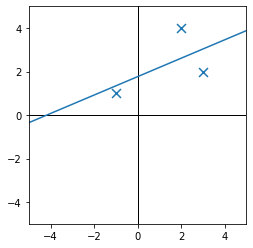

In [10]:
lm_plot(X)

[1.3721 0.5698]


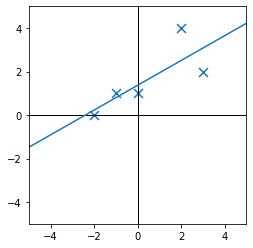

In [11]:
X2 = np.loadtxt('simple2.dat')
lm_plot(X2)

予測

In [15]:
def lm_predict (x,w):
  yhat = w[0]+w[1]*x
  return yhat
def lm_error (x,y,w):
  yhat = lm_predict (x,w)
  return (y - yhat)**2
def lm_errors (X,w):
  return np.array([lm_error(x[0],x[1],w) for x in X])
def lm_mse (X,w):
  errors = lm_errors(X,w)
  print(mean(errors))

In [13]:
w = linear_model(X)
print(w)

[1.7692 0.4231]


In [16]:
lm_errors(X2, w)

array([ 0.1479,  2.1361, 10.1908, 14.2071,  4.8062])

In [17]:
lm_mse(X2, w)

6.297633136094676


tensorflowで単回帰分析

In [20]:
import tensorflow as tf
from sklearn.datasets import load_boston
import seaborn as sns
from pandas import DataFrame
from sklearn.linear_model import LinearRegression
sns.set()
boston = load_boston()

boston_df = DataFrame(boston.data)
boston_df.columns = boston.feature_names

X_multiple_data = boston_df.copy()
Y_target = boston.target

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [19]:
print(X_multiple_data.shape)
print(Y_target.shape)

(506, 13)
(506,)


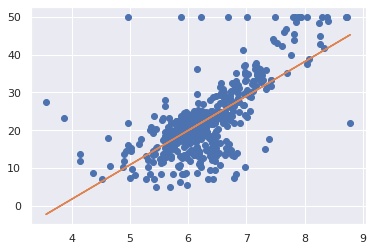

In [24]:
X = boston_df['RM']
X = np.array(X).reshape(-1,1) # (-1, n)でnからもう一方を推測

model = LinearRegression()
model.fit(X, Y_target)
predict_data = model.predict(X)
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(X, Y_target, 'o')
ax.plot(X, predict_data)
plt.show()